# `add_boundary_regions`
This function pads a watershed segmentation with additional labled regions, that becoming boundary pores in the final extracted network

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
from edt import edt
import scipy.ndimage as spim
from skimage.segmentation import watershed
import inspect
inspect.signature(ps.networks.add_boundary_regions)

<Signature (regions, pad_width=3)>

## `regions`
The function requires an image of labeled regions, presumably coming from a watershed segmentation, but could potentially be any labelled image.  

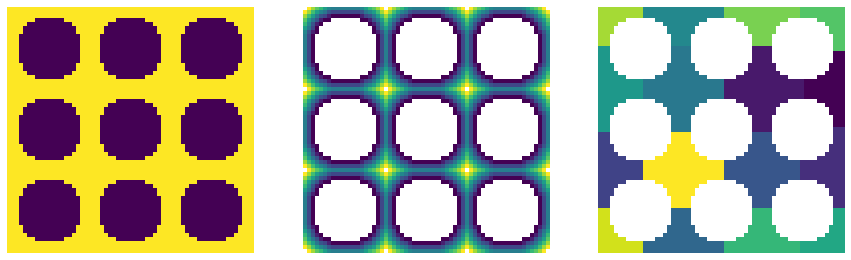

In [2]:
im = ps.generators.lattice_spheres(shape=[61, 61], r=8, spacing=20, offset=10)
dt = edt(im)
pk = ps.filters.find_peaks(dt, r_max=5)
ws = watershed(image=-dt, markers=spim.label(pk)[0])
ws = ps.tools.randomize_colors(ws)

fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].imshow(im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[1].imshow(dt/im/~pk, interpolation='none', origin='lower')
ax[1].axis(False)
ax[2].imshow(ws/im, interpolation='none', origin='lower')
ax[2].axis(False);

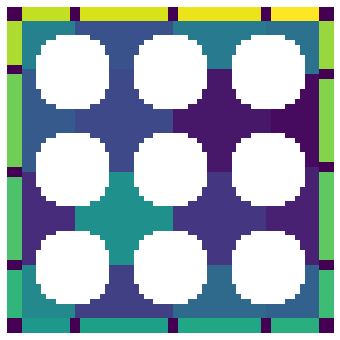

In [3]:
ws_w_bd = ps.networks.add_boundary_regions(ws)
temp = np.pad(im, 3, mode='constant', constant_values=True)

fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(ws_w_bd/temp, interpolation='none', origin='lower')
ax.axis(False);

The above image contains the original regions, plus new regions around the borders.  These regions have their own region number so they will be recognized as pores by the network extraction tool.  They are also bounded by ``False`` pixels on each side so that they do not get connected to each other during the network extraction.  

## `pad_width`
You can control the thickness of the boundary regions as well as which sides they are added to.  This argument works approximately like it does in ``np.pad``.

Adding padding to all sides:

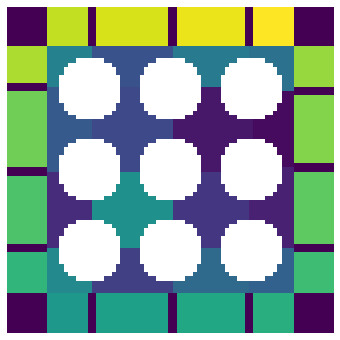

In [4]:
pw = 10
ws_w_bd = ps.networks.add_boundary_regions(ws, pad_width=pw)
temp = np.pad(im, pw, mode='constant', constant_values=True)

fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(ws_w_bd/temp, interpolation='none', origin='lower')
ax.axis(False);

Adding padding to the beginning of each axis:

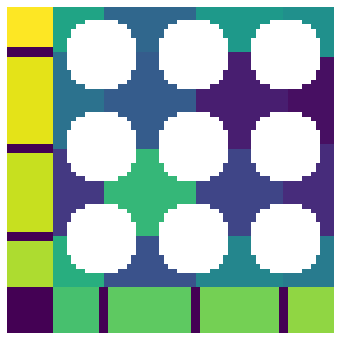

In [5]:
pw = [10, 0]
ws_w_bd = ps.networks.add_boundary_regions(ws, pad_width=pw)
temp = np.pad(im, pw, mode='constant', constant_values=True)

fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(ws_w_bd/temp, interpolation='none', origin='lower')
ax.axis(False);

Adding padding to the beginning and end of a single axis:

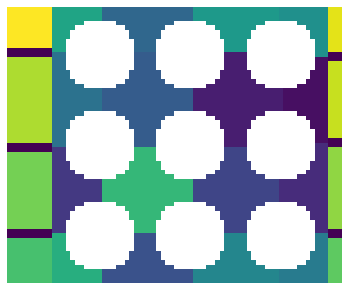

In [6]:
pw = [[0, 0], [10, 3]]
ws_w_bd = ps.networks.add_boundary_regions(ws, pad_width=pw)
temp = np.pad(im, pw, mode='constant', constant_values=True)

fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(ws_w_bd/temp, interpolation='none', origin='lower')
ax.axis(False);